## Activity 1

In [13]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [80]:
# Hough Transform (circular objects detection)
img = cv.imread('coins_1.jfif')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 1.5)

rows = img.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows/8,
                         param1 = 150, param2 = 25)

# draw circles
if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0]:
        center = (i[0], i[1])
        # circle center
        cv.circle(img, center, 1, (100, 100, 100), 3)
        # radius
        radius = i[2]
        # Plot whole circle
        cv.circle(img, center, radius, (255, 0, 255), 3)
        
cv.imshow("detected circles", img)
cv.waitKey(0)
cv.destroyAllWindows()

In [98]:
# Blob Detection
im = cv.imread('coins_1.jfif') 
blur = cv.GaussianBlur(im, (3, 3), 0)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

# set up the parameters
params = cv.SimpleBlobDetector_Params()
params.filterByArea = False
params.filterByCircularity = True
params.filterByConvexity = False
params.filterByInertia = True

# Detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

# Draw detected blobs as circles
im_with_keypoints = cv.drawKeypoints(im, keypoints, np.array([]), (0, 0, 255),
                                    cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow("keypoints", im_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()

## Activity 2

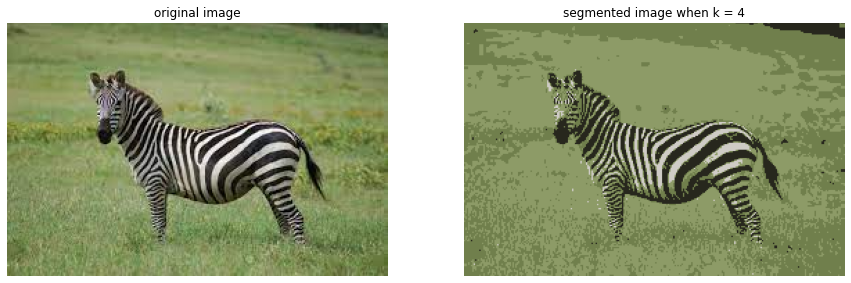

In [48]:
img = cv.imread('zebra.jfif')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape the image and change the data type
img_reshape = img_rgb.reshape((-1, 3))


img_reshape = np.float32(img_reshape)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 10
ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# convert the center back to uint8
center = np.uint8(center)

# Visualise
res = center[label.flatten()]
result_image = res.reshape((img_rgb.shape))


plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1), plt.imshow(img_rgb)
plt.title('original image'), plt.axis("off")
plt.subplot(1, 2, 2), plt.imshow(result_image)
plt.title(f"segmented image when k = {K}"), plt.axis("off")
plt.show()


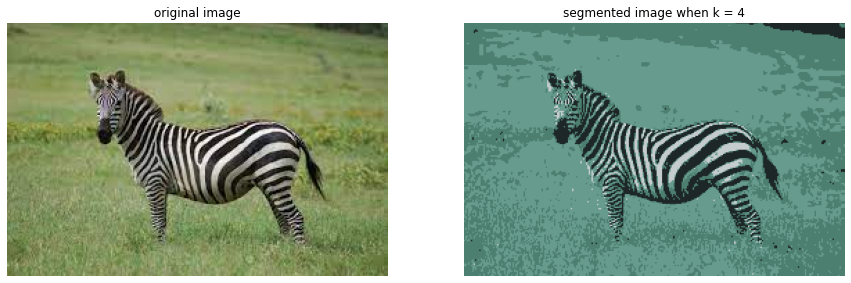

In [55]:
img = cv.imread('zebra.jfif')
# Reshape the image and change the data type
img_reshape = img.reshape((-1, 3))


img_reshape = np.float32(img_reshape)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 10
ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# convert the center back to uint8
center = np.uint8(center)

# Visualise
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1), plt.imshow(img_rgb)
plt.title('original image'), plt.axis("off")
plt.subplot(1, 2, 2), plt.imshow(result_image)
plt.title(f"segmented image when k = {K}"), plt.axis("off")
plt.show()


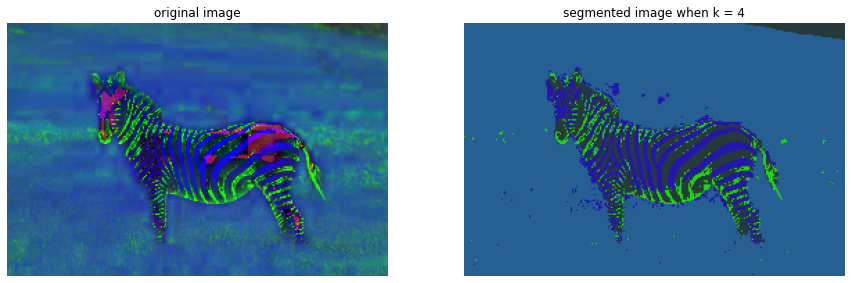

In [53]:
img = cv.imread('zebra.jfif')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Reshape the image and change the data type
img_reshape = img_hsv.reshape((-1, 3))


img_reshape = np.float32(img_reshape)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 10
ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# convert the center back to uint8
center = np.uint8(center)

# Visualise
res = center[label.flatten()]
result_image = res.reshape((img_hsv.shape))


plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1), plt.imshow(img_hsv)
plt.title('original image'), plt.axis("off")
plt.subplot(1, 2, 2), plt.imshow(result_image)
plt.title(f"segmented image when k = {K}"), plt.axis("off")
plt.show()


- After applying clustering method on 2 color space which are BGR and HSV, HSV color space has clearer segmentation result compare to BGR color space. In HSV color space image, the zebra was shown and there are less noice while in BGR color space image, there appear some background noise.